In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import fiona
import pyproj
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
from matplotlib.colors import ListedColormap

<AxesSubplot:>

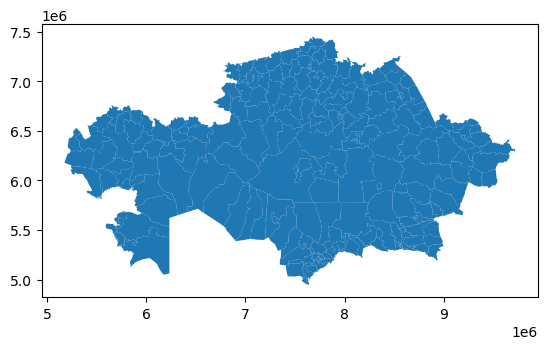

In [113]:
# Read the shapefile
shapefile_path = 'geoBoundaries-KAZ-ADM0-all//geoBoundaries-KAZ-ADM0_simplified.shp'
shapefile_path = 'kaz_adm_unhcr_2023_shp//kaz_admbnda_adm2_unhcr_2023.shp'

gdf = gpd.read_file(shapefile_path, crs='ESRI:102100')
# Plot the shapefile
gdf.plot()

In [114]:
gdf

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,geometry
0,KAZ,Kazakhstan,Mangystau Region,KAZ014,Beyneu District,KAZ014002,"POLYGON ((6193857.398 5546479.677, 6191672.410..."
1,KAZ,Kazakhstan,Akmola Region,KAZ002,Arshaly District,KAZ002002,"POLYGON ((7973376.148 6629750.498, 7973518.092..."
2,KAZ,Kazakhstan,Ulytau Region,KAZ019,Ulytau District,KAZ019004,"POLYGON ((7007571.886 5973268.455, 7013048.694..."
3,KAZ,Kazakhstan,Turkistan Region,KAZ018,Sayram District,KAZ018010,"MULTIPOLYGON (((7727716.674 5237038.799, 77277..."
4,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zelenov District,KAZ020011,"POLYGON ((5594209.782 6671783.775, 5595743.420..."
...,...,...,...,...,...,...,...
213,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zhanakala District,KAZ020012,"POLYGON ((5534635.925 6117615.754, 5521699.316..."
214,KAZ,Kazakhstan,Almaty,KAZ004,Alatau District,KAZ004001,"POLYGON ((8542465.976 5359957.633, 8542835.100..."
215,KAZ,Kazakhstan,Kyzylorda Region,KAZ013,Zhalagash District,KAZ013008,"POLYGON ((7051986.927 5411512.228, 7055856.571..."
216,KAZ,Kazakhstan,Aktobe Region,KAZ003,Ayteke Bi District,KAZ003003,"POLYGON ((6853078.872 6354925.576, 6843108.304..."


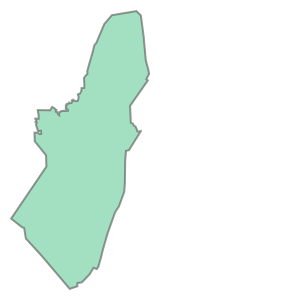

In [115]:
gdf.iloc[5]["geometry"]

In [116]:
target_crs = 'EPSG:4326'  # For example, WGS 84 (EPSG:4326)

# Create a transformer to handle the coordinate transformation
transformer = pyproj.Transformer.from_crs(gdf.crs, target_crs, always_xy=True)

# Function to reproject a single geometry
def reproject_geometry(geom):
    if isinstance(geom, Polygon):
        # Extract the coordinates of the geometry and transform them
        transformed_coords = [transformer.transform(x, y) for x, y in geom.exterior.coords]
        # Recreate the geometry with the transformed coordinates
        return Polygon(transformed_coords)
    elif isinstance(geom, MultiPolygon):
        # Transform each part of the MultiPolygon and create a new MultiPolygon
        reprojected_parts = [Polygon([transformer.transform(x, y) for x, y in part.exterior.coords]) for part in geom.geoms]
        return MultiPolygon(reprojected_parts)
    else:
        raise ValueError("Unsupported geometry type")

# Update the geometry of each feature in the GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(reproject_geometry)

# Update the GeoDataFrame's CRS to the target CRS
gdf.crs = target_crs

C:\ProgramData\anaconda3\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


<AxesSubplot:>

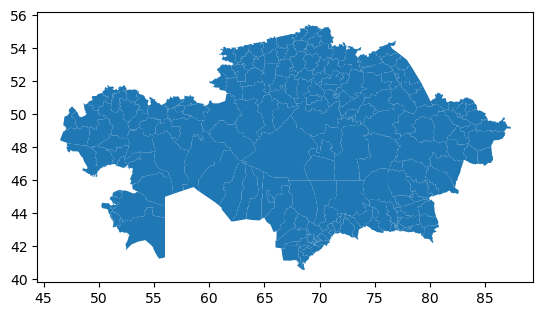

In [117]:
gdf.plot()

# AgroClimatic Zones

In [118]:
# Read the shapefile
shapefile_path = 'c1976_2000_0//c1976_2000.shp'
# shapefile_path = 'c2076_2100_a1fi_0//c2076_2100_A1FI.shp'

world_climate_zones_gdf = gpd.read_file(shapefile_path)
# Plot the shapefile
world_climate_zones_gdf

,ID,GRIDCODE,geometry
0,1,62,"POLYGON ((-37.50000 83.50000, -38.00000 83.500..."
1,2,62,"POLYGON ((-29.50000 83.50000, -37.00000 83.500..."
2,3,62,"POLYGON ((-46.00000 83.00000, -46.00000 83.500..."
3,4,62,"POLYGON ((-42.50000 83.50000, -39.50000 83.500..."
4,5,61,"POLYGON ((55.50000 81.00000, 55.50000 81.50000..."
...,...,...,...
2254,2255,61,"POLYGON ((-59.50000 -73.00000, -59.00000 -73.0..."
2255,2256,61,"POLYGON ((168.50000 -76.50000, 168.00000 -76.5..."
2256,2257,61,"POLYGON ((-66.00000 -77.00000, -66.50000 -77.0..."
2257,2258,61,"POLYGON ((-159.00000 -80.00000, -164.00000 -80..."


<AxesSubplot:>

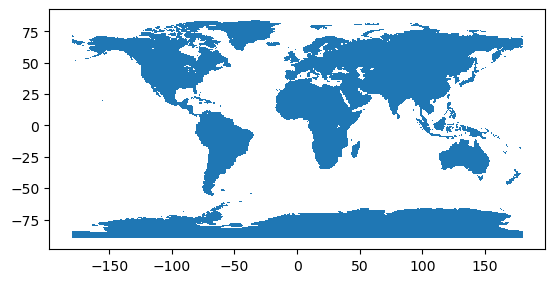

In [119]:
world_climate_zones_gdf.plot()

In [127]:
intersections = gpd.sjoin(gdf, world_climate_zones_gdf, how='inner', op='intersects')

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_6716\1782592623.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["GCS_Bessel_1841",DATUM["D_Bessel_1841",SPH ...

  intersections = gpd.sjoin(gdf, world_climate_zones_gdf, how='inner', op='intersects')


C:\ProgramData\anaconda3\lib\site-packages\geopandas\plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


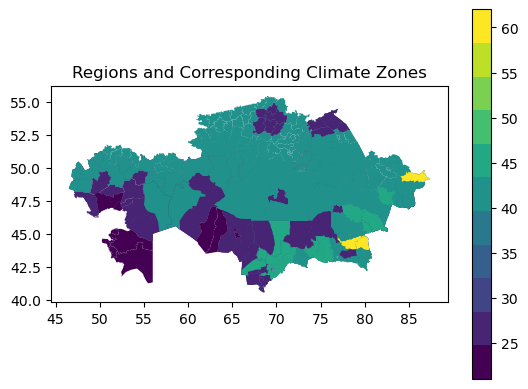

In [129]:
unique_values = intersections['GRIDCODE'].unique()

# Step 2: Create a custom colormap with a color for each unique value
num_unique_values = len(unique_values)
colors = plt.cm.get_cmap('viridis', num_unique_values)  # You can choose a different colormap
custom_colormap = ListedColormap([colors(i) for i in range(num_unique_values)])

# Step 3: Plot the GeoDataFrame with the custom colormap
intersections.plot(column='GRIDCODE', cmap=custom_colormap, legend=True)

# Add a title
plt.title('Regions and Corresponding Climate Zones')

# Display the plot
plt.show()